Index(['Unnamed: 0', 'kahu', 'discharge', 'arki', '3day_arki', 'kahu.1',
       '3day_kahu', '90day_kahu'],
      dtype='object')
<class 'pandas.core.series.Series'>
DatetimeIndex: 966 entries, 2010-05-31 to 2018-09-29
Series name: discharge
Non-Null Count  Dtype  
--------------  -----  
966 non-null    float64
dtypes: float64(1)
memory usage: 15.1 KB
None
             kahu        arki     3day_arki      kahu.1   3day_kahu  \
count  966.000000  966.000000  9.660000e+02  966.000000  966.000000   
mean     7.424379    8.873016  8.922507e+00    7.424379    7.437008   
std     16.127962   22.403519  1.593098e+01   16.127962   10.533363   
min      0.000000    0.000000  0.000000e+00    0.000000    0.000000   
25%      0.000000    0.000000  2.368476e-15    0.000000    0.733333   
50%      0.500000    0.000000  3.333333e+00    0.500000    3.500000   
75%      7.500000    7.293750  1.106458e+01    7.500000    9.733333   
max    183.000000  272.200000  1.708667e+02  183.000000   86.433333   



<Figure size 640x480 with 0 Axes>

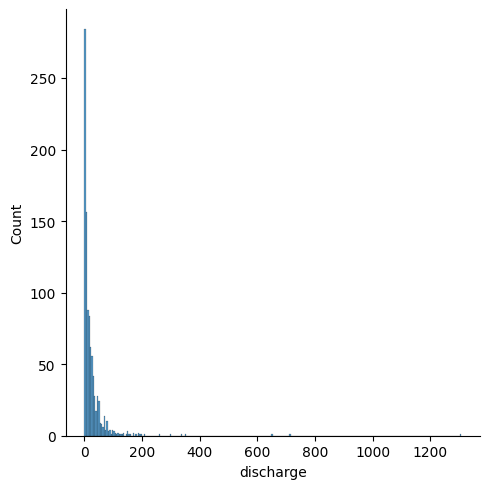

PearsonRResult(statistic=0.47054931413570755, pvalue=2.2114601644658616e-54)


In [153]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
Q=pd.read_csv(r"D:\Dekstop\Dekstop folders\Data Science\python course\major project part 2\data3_new_ANN.csv",parse_dates=["date"],index_col="date").loc[:,"discharge"]
RF=pd.read_csv(r"D:\Dekstop\Dekstop folders\Data Science\python course\major project part 2\data3_new_ANN.csv",parse_dates=["date"],index_col="date")
print(RF.columns)
RF.drop("Unnamed: 0",axis=1,inplace=True)
RF.drop("discharge",axis=1,inplace=True)
#RF.drop(["rainfall"],axis=1,inplace=True)
print(Q.info())
print(RF.describe())

#Q=pd.Series(np.log(Q))

print(Q.describe())
import seaborn as sns


sns.displot(Q)
plt.show()
plt.clf()

RF.plot(grid=True)

Q
from scipy.stats import pearsonr
print(pearsonr(RF["kahu"],Q))

In [154]:
from random import randint
a=randint(0,100000)
from sklearn.model_selection import train_test_split
from fast_ml.model_development import train_valid_test_split

#x_train, y_train, x_val, y_val, x_test, y_test = train_valid_test_split(df, target="discharge",train_size=0.6,valid_size=0.2, test_size=0.2
 #                                                                    ,random_state=3138  )
x_train, x_test, y_train,y_test = train_test_split(RF,Q, test_size=0.2,random_state=a)
a
  # random_state= 45075,3138


10545

In [155]:
x_train=pd.concat([RF["2011"],RF["2013":"2016"]])
y_train=pd.concat([Q["2011"],Q["2013":"2016"]])
x_test=RF["2017"]
y_test=Q["2017"]

In [156]:
y_test

date
2017-05-31     1.755645
2017-06-01     2.067130
2017-06-02     1.444159
2017-06-07     1.953862
2017-06-08     3.766141
                ...    
2017-09-23    36.019029
2017-09-24    25.485162
2017-09-25    17.188326
2017-09-26    13.478819
2017-09-29    10.222382
Name: discharge, Length: 112, dtype: float64

count    112.000000
mean      23.634454
std       42.334220
min        1.019406
25%        3.284754
50%       12.954958
75%       26.561202
max      350.619200
Name: discharge, dtype: float64


<Figure size 640x480 with 0 Axes>

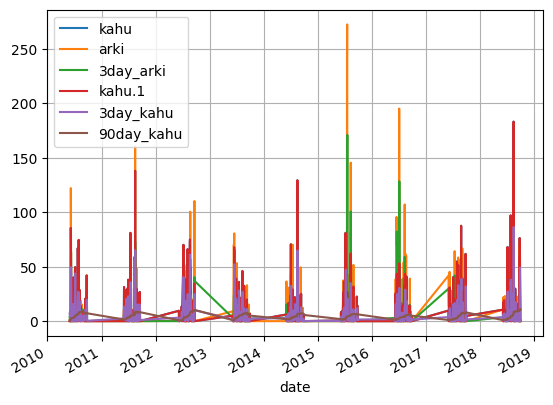

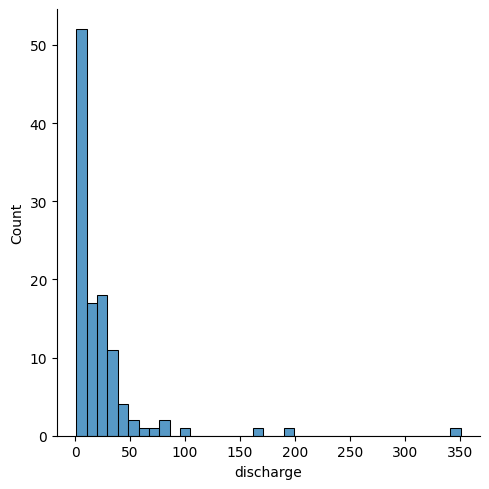

In [157]:
print(y_test.describe())

sns.displot(y_test)
plt.show()
plt.clf()


count    545.000000
mean      17.757264
std       24.437215
min        0.368000
25%        4.474062
50%        9.514461
75%       20.246546
max      178.856556
Name: discharge, dtype: float64


<Figure size 640x480 with 0 Axes>

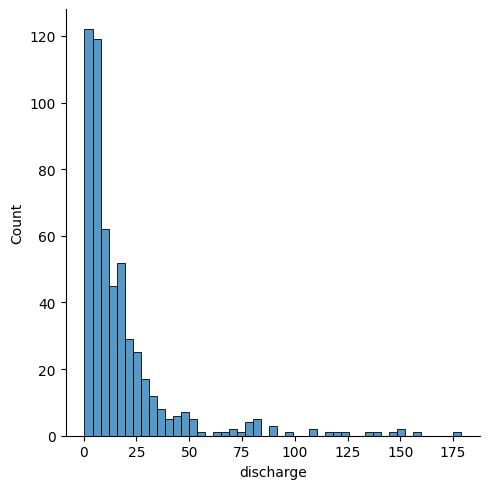

In [158]:
print(y_train.describe())

sns.displot(y_train)
plt.show()
plt.clf()


In [159]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
scaler.fit(x_train,y_train)
x_test=scaler.transform(x_test)
#y_train=scaler.transform(y_train)
x_train=scaler.transform(x_train)
#x_val=scaler.transform(x_val)

In [160]:
import tensorflow
from keras import regularizers
l2_reg = regularizers.L1L2(l1=0.45,l2=0.69)

from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
model=keras.Sequential([#keras.layers.Flatten(input_shape=(6,)),keras.layers.Dropout(0.3),
#                keras.layers.Dense(17,activation="tanh"),keras.layers.Dropout(0.4),
                keras.layers.Dense(10,activation="relu",kernel_regularizer=l2_reg),#keras.layers.Dropout(0.3),
                keras.layers.Dense(9,activation="relu",kernel_regularizer=l2_reg),#keras.layers.Dropout(0.3),
#                keras.layers.Dense(5,activation="tanh"),keras.layers.Dropout(0.3),
#               keras.layers.Dense(5,activation="tanh"),keras.layers.Dropout(0.3),
#                keras.layers.Dense(6,activation="tanh"),keras.layers.Dropout(0.3),
#               keras.layers.Dense(5,activation="tanh"),keras.layers.Dropout(0.3),
#              keras.layers.Dense(4,activation="tanh"),keras.layers.Dropout(0.3),
#                keras.layers.Dense(3,activation="tanh"),keras.layers.Dropout(0.3),
#                keras.layers.Dense(2,activation="tanh"),keras.layers.Dropout(0.3),
                keras.layers.Dense(1,activation="relu")])
# Create the optimizer with the initial learning rate

from keras.optimizers import Adam,SGD
opt = Adam(learning_rate=0.0005)

model.compile(optimizer=opt,loss="mean_squared_error")



model.fit(x_train,y_train,batch_size=30,epochs=8)
from ann_visualizer.visualize import ann_viz;

ann_viz(model, view=True, filename="network.gv", title="MyNeural Network")

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


print(model.evaluate(x_train,y_train))
print(model.evaluate(x_test,y_test))


y_pred_training=model.predict(x_train).reshape(-1,1)
y_pred=model.predict(x_test).reshape(-1,1)


error=mean_absolute_error(y_train,y_pred_training)
print(error)

##r2
score=r2_score(y_train,y_pred_training)
n=x_train.shape[0]
p=x_train.shape[1]
adjusted_r2=1- ((1-score) * (n-1)/(n-p-1))
print("r2 score: " ,score,"\n")
print("adjusted r2 score: " ,adjusted_r2,"\n")
 

print("now testing data: \n")
error=mean_squared_error(y_test,y_pred)
print(error)
error=mean_absolute_error(y_test,y_pred)
print(error)
score=r2_score(y_test,y_pred)
n=x_test.shape[0]
p=x_train.shape[1]
adjusted_r2=1- ((1-score) * (n-1)/(n-p-1))
print("r2 score: " ,score,"\n")
print("adjusted r2 score: " ,adjusted_r2,"\n")

arr=[]
for a in y_pred:
    for b in a:
        arr.append(b)

y_pred1=arr

Epoch 1/8
19/19 [==============================] - 1s 4ms/step - loss: 936.7495
Epoch 2/8
19/19 [==============================] - 0s 4ms/step - loss: 932.9756
Epoch 3/8
19/19 [==============================] - 0s 4ms/step - loss: 928.7969
Epoch 4/8
19/19 [==============================] - 0s 3ms/step - loss: 925.2023
Epoch 5/8
19/19 [==============================] - 0s 3ms/step - loss: 920.8736
Epoch 6/8
19/19 [==============================] - 0s 3ms/step - loss: 915.3629
Epoch 7/8
19/19 [==============================] - 0s 3ms/step - loss: 907.1392
Epoch 8/8
19/19 [==============================] - 0s 3ms/step - loss: 899.0535


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
import tensorflow
from keras import regularizers
l2_reg = regularizers.L1L2(l1=0.45,l2=0.69)

from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
model=keras.Sequential([keras.layers.Flatten(input_shape=(6,)),keras.layers.Dropout(0.3),
#                keras.layers.Dense(17,activation="tanh"),keras.layers.Dropout(0.4),
                keras.layers.Dense(10,activation="relu",kernel_regularizer=l2_reg),keras.layers.Dropout(0.3),
                keras.layers.Dense(9,activation="relu",kernel_regularizer=l2_reg),keras.layers.Dropout(0.3),
#                keras.layers.Dense(5,activation="tanh"),keras.layers.Dropout(0.3),
#               keras.layers.Dense(5,activation="tanh"),keras.layers.Dropout(0.3),
#                keras.layers.Dense(6,activation="tanh"),keras.layers.Dropout(0.3),
#               keras.layers.Dense(5,activation="tanh"),keras.layers.Dropout(0.3),
#              keras.layers.Dense(4,activation="tanh"),keras.layers.Dropout(0.3),
#                keras.layers.Dense(3,activation="tanh"),keras.layers.Dropout(0.3),
#                keras.layers.Dense(2,activation="tanh"),keras.layers.Dropout(0.3),
                keras.layers.Dense(1,activation="relu")])
# Create the optimizer with the initial learning rate

from keras.optimizers import Adam,SGD
opt = Adam(learning_rate=0.0005)


model.compile(optimizer=opt,loss="mean_squared_error")


from ann_visualizer.visualize import ann_viz;

ann_viz(model, view=True, filename="network.gv", title="MyNeural Network")
model.fit(x_train,y_train,batch_size=30,epochs=800)

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


print(model.evaluate(x_train,y_train))
print(model.evaluate(x_test,y_test))


y_pred_training=model.predict(x_train).reshape(-1,1)
y_pred=model.predict(x_test).reshape(-1,1)


error=mean_absolute_error(y_train,y_pred_training)
print(error)

##r2
score=r2_score(y_train,y_pred_training)
n=x_train.shape[0]
p=x_train.shape[1]
adjusted_r2=1- ((1-score) * (n-1)/(n-p-1))
print("r2 score: " ,score,"\n")
print("adjusted r2 score: " ,adjusted_r2,"\n")
 

print("now testing data: \n")
error=mean_squared_error(y_test,y_pred)
print(error)
error=mean_absolute_error(y_test,y_pred)
print(error)
score=r2_score(y_test,y_pred)
n=x_test.shape[0]
p=x_train.shape[1]
adjusted_r2=1- ((1-score) * (n-1)/(n-p-1))
print("r2 score: " ,score,"\n")
print("adjusted r2 score: " ,adjusted_r2,"\n")

arr=[]
for a in y_pred:
    for b in a:
        arr.append(b)

y_pred2=arr

Epoch 1/800
19/19 [==============================] - 0s 4ms/step - loss: 935.4374
Epoch 2/800
19/19 [==============================] - 0s 4ms/step - loss: 933.8582
Epoch 3/800
19/19 [==============================] - 0s 4ms/step - loss: 928.1467
Epoch 4/800
19/19 [==============================] - 0s 4ms/step - loss: 922.0065
Epoch 5/800
19/19 [==============================] - 0s 4ms/step - loss: 907.7227
Epoch 6/800
19/19 [==============================] - 0s 4ms/step - loss: 907.2845
Epoch 7/800
19/19 [==============================] - 0s 4ms/step - loss: 913.6625
Epoch 8/800
19/19 [==============================] - 0s 3ms/step - loss: 886.4597
Epoch 9/800
19/19 [==============================] - 0s 3ms/step - loss: 897.6569
Epoch 10/800
19/19 [==============================] - 0s 3ms/step - loss: 891.0854
Epoch 11/800
19/19 [==============================] - 0s 4ms/step - loss: 863.5222
Epoch 12/800
19/19 [==============================] - 0s 3ms/step - loss: 856.1937
Epoch 13/800


In [ ]:
y_pred=(np.array(y_pred0)+np.array(y_pred1)+np.array(y_pred2))/3
score=r2_score(y_test,y_pred)
n=x_test.shape[0]
p=x_train.shape[1]
adjusted_r2=1- ((1-score) * (n-1)/(n-p-1))
print("r2 score: " ,score,"\n")
print("adjusted r2 score: " ,adjusted_r2,"\n")

r2 score:  0.12235726430948302 

adjusted r2 score:  0.07220625084145349 



In [ ]:
df=pd.DataFrame({"date":y_test.index,"actual":y_test.tolist(),"predicted":y_pred})
df["difference"]=df["predicted"]-df["actual"]
df["relative error"]=df["difference"]/df["actual"]
print("total error:", df["difference"].sum())

print("cummulative relative error: " ,df["relative error"].sum())
print("mean relative error: " ,df["relative error"].mean())


pd.set_option("display.max_rows",700)
print(df)
pd.set_option("display.max_rows",20)

total error: -873.7894684074968
cummulative relative error:  120.52122318790613
mean relative error:  1.0760823498920191
          date      actual  predicted  difference  relative error
0   2017-05-31    1.755645  21.358536   19.602891       11.165638
1   2017-06-01    2.067130  12.999110   10.931980        5.288483
2   2017-06-02    1.444159   8.931693    7.487534        5.184701
3   2017-06-07    1.953862  25.018976   23.065114       11.804881
4   2017-06-08    3.766141  12.251576    8.485436        2.253085
5   2017-06-09    2.718417  11.135726    8.417309        3.096400
6   2017-06-10    2.435249  13.167310   10.732061        4.406967
7   2017-06-11    2.123764   7.604578    5.480814        2.580708
8   2017-06-12    1.642377   7.604578    5.962201        3.630226
9   2017-06-13    1.444159   6.382238    4.938079        3.419345
10  2017-06-15    1.104357   7.412032    6.307675        5.711626
11  2017-06-16    1.160991   6.430079    5.269088        4.538441
12  2017-06-17    1.0

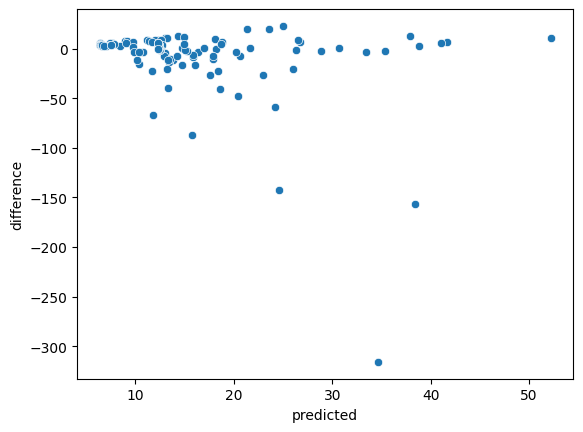

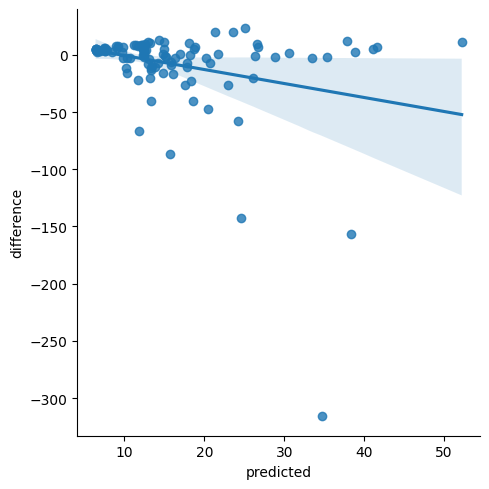

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data=df,x="predicted",y="difference")
plt.show()

sns.lmplot(data=df,x="predicted",y="difference")
plt.show()

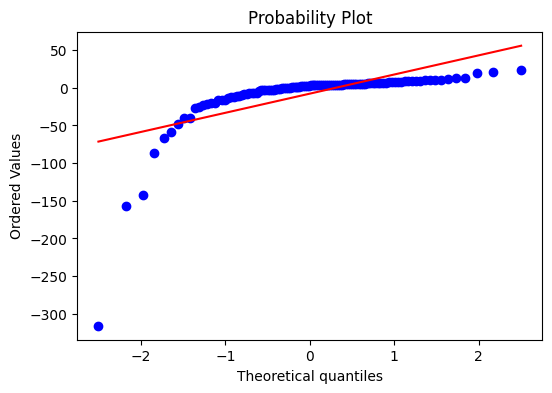

In [ ]:
from scipy.stats import probplot

fig,ax=plt.subplots(figsize=(6,4))
probplot(df["difference"],plot=ax)
plt.show()


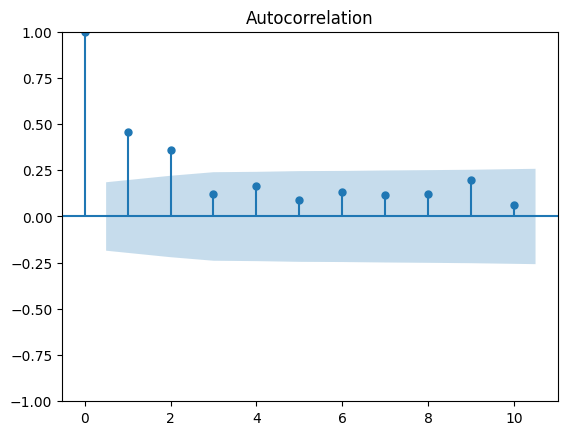

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
residuals=pd.DataFrame({"date":df["date"],"residuals":df["difference"]})
residuals.set_index("date",inplace=True,drop=True)
plot_acf(x=residuals,lags=10)
plt.show()

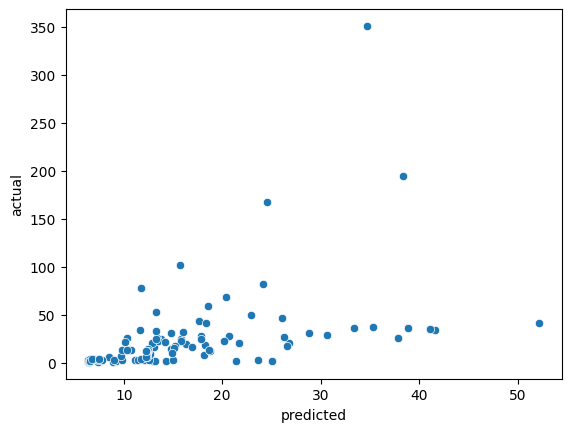

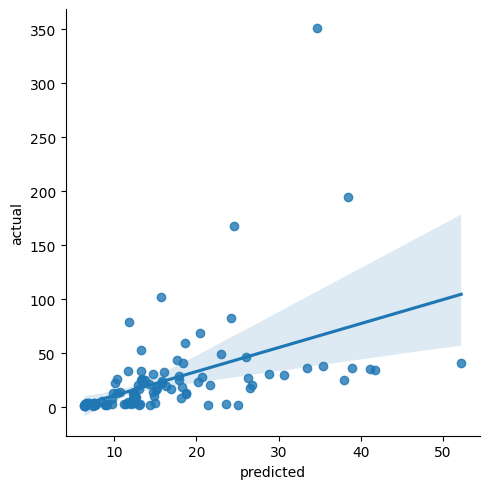

In [ ]:
sns.scatterplot(data=df,x="predicted",y="actual")
plt.show()

sns.lmplot(data=df,x="predicted",y="actual")
plt.show()

In [ ]:
from xgboost import XGBRegressor
regressor=XGBRegressor(max_depth=2,min_child_weight=3,gamma=1,colsample_bytree=0.5)

regressor.fit(x_train,y_train)
#y_train=np.exp(y_train)
#y_test=np.exp(y_test)
print(regressor.score(x_train,y_train))
r2=regressor.score(x_test,y_test)

n=x_test.shape[0]
p=x_train.shape[1]
adjusted_r2=1- ((1-r2) * (n-1)/(n-p-1))
print("r2 score: " ,r2,"\n")
print("adjusted r2 score: " ,adjusted_r2,"\n")
from sklearn.metrics import mean_squared_error,mean_absolute_error

y_preda=regressor.predict(x_train).reshape(-1,1)
y_predb=regressor.predict(x_test).reshape(-1,1)
#y_pred1=np.exp(y_pred1)
#y_pred=np.exp(y_pred)


print(mean_absolute_error(y_train,y_preda))
print(mean_absolute_error(y_test,y_predb))
arr=[]
for a in y_predb:
    for b in a:
        arr.append(b)

y_pred4=arr
len(y_pred4)

0.8869791274173437
r2 score:  0.28860117924072726 

adjusted r2 score:  0.24794981805448313 

5.293203957379944
15.689917583961755


112

In [ ]:
y_pred=(np.array(y_pred0)+np.array(y_pred1)+np.array(y_pred2)+np.array(y_pred4))/5
score=r2_score(y_test,y_pred)
n=x_test.shape[0]
p=x_train.shape[1]
adjusted_r2=1- ((1-score) * (n-1)/(n-p-1))
print("r2 score: " ,score,"\n")
print("adjusted r2 score: " ,adjusted_r2,"\n")

r2 score:  0.12055747076907719 

adjusted r2 score:  0.07030361195588153 



#                                                                         **Simulation**

In [ ]:
simulation=pd.read_csv(r"D:\Dekstop\Dekstop folders\Data Science\python course\practice\simulation_data.csv",parse_dates=["date"],index_col="date")

rf=simulation["rainfall"]
print(simulation.columns)
simulation.drop("Unnamed: 0",axis=1,inplace=True)
simulation.drop(["rainfall"],axis=1,inplace=True)
print(simulation.info())
print(simulation.describe())
simulation

Index(['Unnamed: 0', 'rainfall', '90day', '4day'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37 entries, 2015-06-20 to 2015-09-03
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   90day   37 non-null     float64
 1   4day    37 non-null     float64
dtypes: float64(2)
memory usage: 888.0 bytes
None
           90day        4day
count  37.000000   37.000000
mean    4.472282   46.754054
std     1.417284   38.716036
min     1.571111    0.500000
25%     3.575556   19.100000
50%     4.591111   36.300000
75%     5.891111   71.900000
max     6.631111  142.500000


,90day,4day
date,,
2015-06-20,1.571111,26.5
2015-06-25,1.976667,36.5
2015-06-30,2.073333,18.5
2015-07-05,1.760000,0.6
2015-07-06,2.660000,81.6
...,...,...
2015-08-21,6.028889,10.4
2015-08-22,6.262222,31.4
2015-08-25,6.278889,23.5


In [ ]:

simulation_arr=scaler.transform(simulation)

ValueError: X has 2 features, but RobustScaler is expecting 6 features as input.

In [ ]:
simulation_prediction=model.predict(simulation_arr)
temp=[]
for x in simulation_prediction:
    for y in x:
        temp.append(y)
simulation_prediction=temp
    
print(simulation_prediction)
df=pd.DataFrame({"rainfall":rf.values.tolist(),"predicted discharge":simulation_prediction})
df["date"]=simulation.index
df.set_index("date",inplace=True)


pd.set_option("display.max_rows",100)
print(df)
from scipy.stats import pearsonr
print(pearsonr(df["rainfall"],df["predicted discharge"]))


2/2 [==============================] - 0s 15ms/step
[76.0219, 77.34284, 71.36456, 0.0, 77.81552, 77.81746, 77.82091, 77.82091, 77.79295, 77.81698, 77.68242, 77.749954, 74.01822, 77.54562, 77.78914, 77.81154, 77.78797, 77.3442, 0.4775257, 71.30719, 72.16494, 72.81009, 73.590096, 51.76632, 0.0, 74.358215, 77.64688, 77.82028, 77.820595, 77.81919, 77.80848, 0.0, 48.95186, 76.94891, 75.122025, 77.21559, 0.0]
            rainfall  predicted discharge
date                                     
2015-06-20      26.5            76.021896
2015-06-25      36.5            77.342842
2015-06-30      18.5            71.364563
2015-07-05       0.6             0.000000
2015-07-06      81.0            77.815521
2015-07-07       5.0            77.817459
2015-07-08      55.5            77.820908
2015-07-09       1.0            77.820908
2015-07-10       2.0            77.792953
2015-07-11      26.5            77.816978
2015-07-12      17.8            77.682419
2015-07-13       7.5            77.749954
2015-

In [ ]:
df.plot(grid=True)

<Axes: xlabel='date'>